In [21]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
pickle_in = open("niftydf.pickle","rb")
df = pickle.load(pickle_in)

In [15]:
df.head()

,Type,Date,open,high,low,close,Year,month,day,day_of_week,...,change,change_in_percentage,ema_12,ema_26,ema_50,ema_100,ema_200,MACD,Signal,Returns
0,NIFTY,2021-01-01,13997.90,14020.85,13991.35,14013.15,2021,1,1,4,...,15.25,0.109,14013.150000,14013.150000,14013.150000,14013.150000,14013.150000,0.000000,14013.15000,NaN
1,NIFTY,2021-01-01,14014.85,14018.55,14008.15,14009.05,2021,1,1,4,...,-5.80,-0.041,14012.519231,14012.846296,14012.989216,14013.068812,14013.109204,0.327066,14012.33000,-0.000293
2,NIFTY,2021-01-01,14008.05,14013.10,14005.05,14012.70,2021,1,1,4,...,4.65,0.033,14012.547041,14012.835460,14012.977874,14013.061509,14013.105132,0.288418,14012.40400,0.000261
3,NIFTY,2021-01-01,14013.65,14019.10,14013.65,14016.20,2021,1,1,4,...,2.55,0.018,14013.109035,14013.084685,14013.104232,14013.123657,14013.135927,-0.024350,14013.16320,0.000250
4,NIFTY,2021-01-01,14015.45,14017.80,14011.95,14015.45,2021,1,1,4,...,0.00,0.000,14013.469184,14013.259893,14013.196223,14013.169723,14013.158953,-0.209290,14013.62056,-0.000054


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22805 entries, 0 to 22804
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Type                  22805 non-null  object        
 1   Date                  22805 non-null  datetime64[ns]
 2   open                  22805 non-null  float64       
 3   high                  22805 non-null  float64       
 4   low                   22805 non-null  float64       
 5   close                 22805 non-null  float64       
 6   Year                  22805 non-null  int64         
 7   month                 22805 non-null  int64         
 8   day                   22805 non-null  int64         
 9   day_of_week           22805 non-null  int64         
 10  week                  22805 non-null  UInt32        
 11  hour                  22805 non-null  int64         
 12  min                   22805 non-null  int64         
 13  change          

In [17]:
df['Target'] = df['change_in_percentage'].apply(lambda x: '1' if (x >= 0 ) else '0')
df.head()

,Type,Date,open,high,low,close,Year,month,day,day_of_week,...,change_in_percentage,ema_12,ema_26,ema_50,ema_100,ema_200,MACD,Signal,Returns,Target
0,NIFTY,2021-01-01,13997.90,14020.85,13991.35,14013.15,2021,1,1,4,...,0.109,14013.150000,14013.150000,14013.150000,14013.150000,14013.150000,0.000000,14013.15000,NaN,1
1,NIFTY,2021-01-01,14014.85,14018.55,14008.15,14009.05,2021,1,1,4,...,-0.041,14012.519231,14012.846296,14012.989216,14013.068812,14013.109204,0.327066,14012.33000,-0.000293,0
2,NIFTY,2021-01-01,14008.05,14013.10,14005.05,14012.70,2021,1,1,4,...,0.033,14012.547041,14012.835460,14012.977874,14013.061509,14013.105132,0.288418,14012.40400,0.000261,1
3,NIFTY,2021-01-01,14013.65,14019.10,14013.65,14016.20,2021,1,1,4,...,0.018,14013.109035,14013.084685,14013.104232,14013.123657,14013.135927,-0.024350,14013.16320,0.000250,1
4,NIFTY,2021-01-01,14015.45,14017.80,14011.95,14015.45,2021,1,1,4,...,0.000,14013.469184,14013.259893,14013.196223,14013.169723,14013.158953,-0.209290,14013.62056,-0.000054,1


In [18]:
df['Target'].value_counts()

1    11687
0    11118
Name: Target, dtype: int64

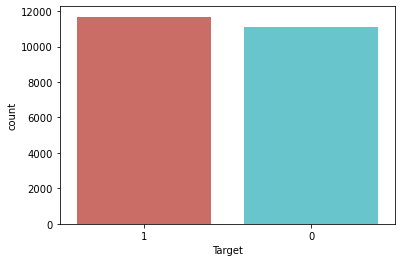

In [22]:
sns.countplot(x='Target', data=df, palette="hls")
plt.show()

In [34]:
df['Returns'] = df['Returns'].fillna(0)

In [35]:
X = pd.DataFrame(df.iloc[:,2:-1])
y = pd.DataFrame(df.iloc[:,-1])

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

# Without Regularization

In [37]:
from sklearn.linear_model import LogisticRegression 
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

D:\Yas_PC\Currently Installed Softwares\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Yas_PC\Currently Installed Softwares\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_pred = logmodel.predict(X_test)

In [39]:
print("Accuracy", (logmodel.score(X_test, y_test)))

Accuracy 0.969743477307608


In [41]:
from sklearn.metrics import confusion_matrix 
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2157   87]
 [  51 2266]]


# With Regularization

In [59]:
logreg = LogisticRegression(penalty='l1',C=0.05, solver='liblinear')
logreg.fit(X_train, y_train)

D:\Yas_PC\Currently Installed Softwares\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=0.05, penalty='l1', solver='liblinear')

In [60]:
y_pred = logreg.predict(X_test)

In [61]:
print("Accuracy", (logreg.score(X_test, y_test)))

Accuracy 0.9986844990133743
